**UBER DATA ANALYSIS**
We will use python to analyze data from uber.
We will use python to :


1. Check how long do people travel with Uber
2. Buisiest hour
3. Purpose of trips
4. Days with highest number of trips
5. Numbers of trips everyday
6. Trips in the month
7. The Boarding points of trips 









**Importing Libraries**

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime 
import calendar

In [11]:
data = pd.read_csv('//content/UberDataset.csv')
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


If a data is not available ,Python uses NotANumber(NaN)

**Check missing number**

In [12]:
data.isnull()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [13]:
data.isnull().any()  #all those columns that are having missing values are true and vice versa

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [14]:
data.isnull().sum()  #Counts all of those missing values in each column

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [16]:
data = data.dropna() #Dropping all NaN values

In [17]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [19]:
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [30]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'],
									errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'],
									errors='coerce')


In [28]:
data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [31]:
hour=[]
day=[]
dayofweek=[]
month=[]
weekday=[]

for x in data['START_DATE']:
  hour.append(x.hour)
  day.append(x.day)
  dayofweek.append(x.dayofweek)
  month.append(x.month)
  weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY'] = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday



In [32]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


**Categories**

In [33]:
data['CATEGORY'].value_counts()

Business    647
Personal      6
Name: CATEGORY, dtype: int64

<Axes: xlabel='CATEGORY', ylabel='count'>

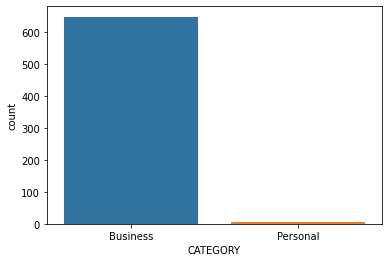

In [35]:
sns.countplot(x='CATEGORY',data=data)

### **Check how long do people travel with Uber**

<Axes: ylabel='Frequency'>

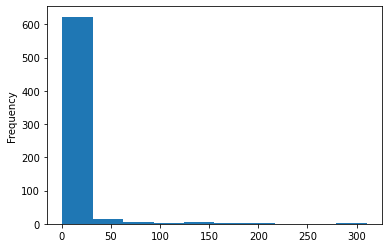

In [41]:
data['MILES'].plot.hist()

### **Buisiest hour**

Text(0.5, 1.0, 'Numbers of Trips vs Hours')

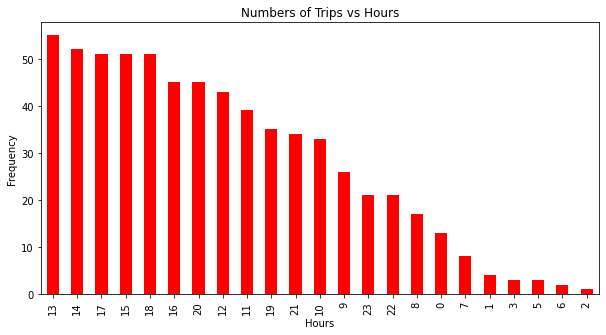

In [38]:
hours =data['START_DATE'].dt.hour.value_counts()
hours.plot(kind='bar' , color= 'red',figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Numbers of Trips vs Hours')

### **Purpose of trips**

Text(0.5, 1.0, 'Purposes of Trips')

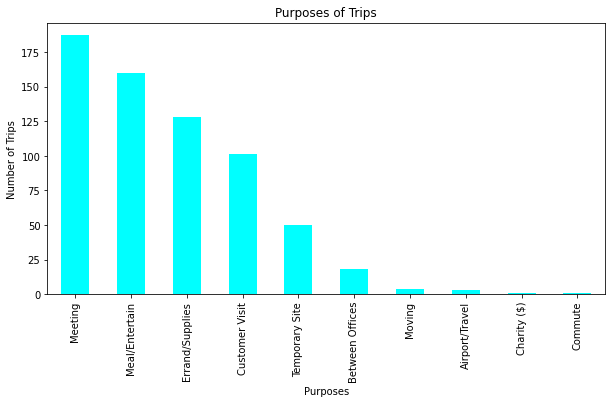

In [43]:
data['PURPOSE'].value_counts().plot(kind='bar',figsize=(10,5),color='cyan')
plt.xlabel('Purposes')
plt.ylabel('Number of Trips')
plt.title('Purposes of Trips')

### **Days with highest number of trips**

Text(0, 0.5, 'Number of Trips')

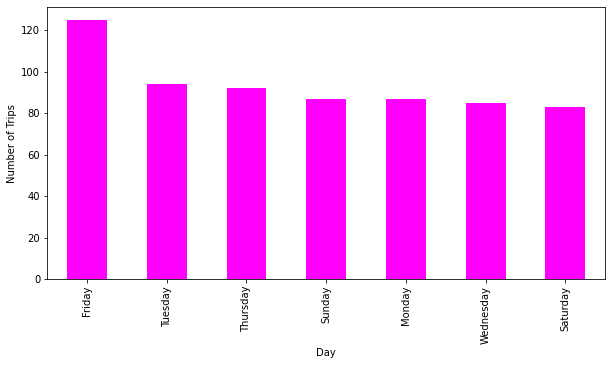

In [45]:
data['WEEKDAY'].value_counts().plot(kind='bar',figsize=(10,5),color='magenta')
plt.xlabel('Day')
plt.ylabel('Number of Trips')

### **Numbers of trips Everyday**

Text(0, 0.5, 'Number of Trips')

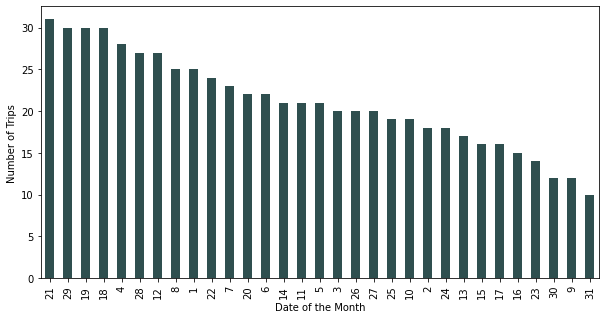

In [50]:
data['DAY'].value_counts().plot(kind='bar',figsize=(10,5),color='darkslategray')
plt.xlabel('Date of the Month')
plt.ylabel('Number of Trips')

### **Trips in the month**

Text(0, 0.5, 'Number of Trips')

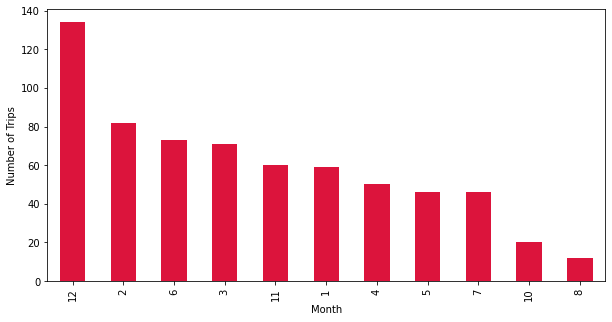

In [51]:
data['MONTH'].value_counts().plot(kind='bar',figsize=(10,5),color='crimson')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

### **The Boarding points of trips**

Text(0.5, 0, 'Boarding Point')

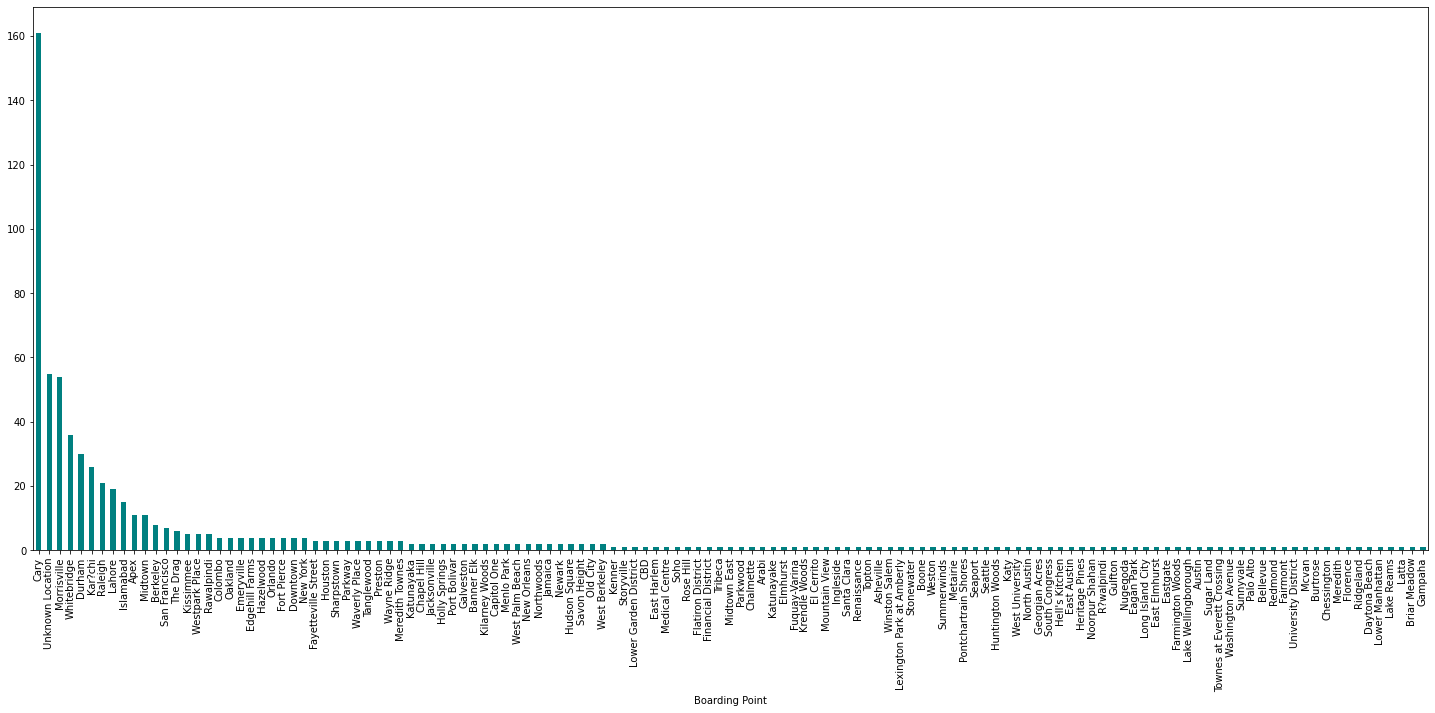

In [55]:
data['START'].value_counts().plot(kind='bar',figsize=(25,10),color='teal')
plt.xlabel('Boarding Point')
